In [36]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = "gray"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


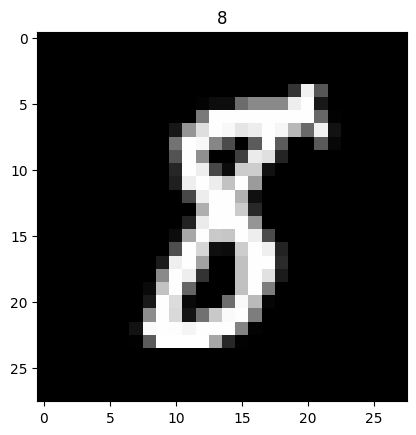

In [6]:
plt.imshow(train_images[125])
plt.title(train_labels[125]);

In [7]:
df = pd.DataFrame(np.unique(test_labels, return_counts=True)).T
df

,0,1
0,0,980
1,1,1135
2,2,1032
3,3,1010
4,4,982
5,5,892
6,6,958
7,7,1028
8,8,974
9,9,1009


In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
callbacks = EarlyStopping(monitor="val_loss", patience=5, verbose=1, restore_best_weights=True)

In [10]:
model = Sequential(
    [
        Flatten(input_shape=(28, 28)),
        Dense(100, activation="relu"),
        Dense(10, activation="softmax")
    ]
)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_images,
    train_labels,
    epochs=500,
    callbacks=[callbacks],
    validation_split=0.2
)

c:\Users\Usuario iTC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8689 - loss: 0.4774 - val_accuracy: 0.9517 - val_loss: 0.1732
Epoch 2/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9582 - loss: 0.1522 - val_accuracy: 0.9653 - val_loss: 0.1209
Epoch 3/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9710 - loss: 0.0992 - val_accuracy: 0.9681 - val_loss: 0.1074
Epoch 4/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9783 - loss: 0.0714 - val_accuracy: 0.9695 - val_loss: 0.1027
Epoch 5/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9833 - loss: 0.0570 - val_accuracy: 0.9720 - val_loss: 0.0906
Epoch 6/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9863 - loss: 0.0450 - val_accuracy: 0.9733 - val_loss: 0.0904
Epoch 7/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9903 - loss: 0.0335 - val_accuracy: 0.9718 - val_loss: 0.0968
Epoch 8/500
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9925 - loss: 0

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"The test accuracy is: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.0944
The test accuracy is: 0.9772999882698059


Text(0.5, 0, 'Epochs')

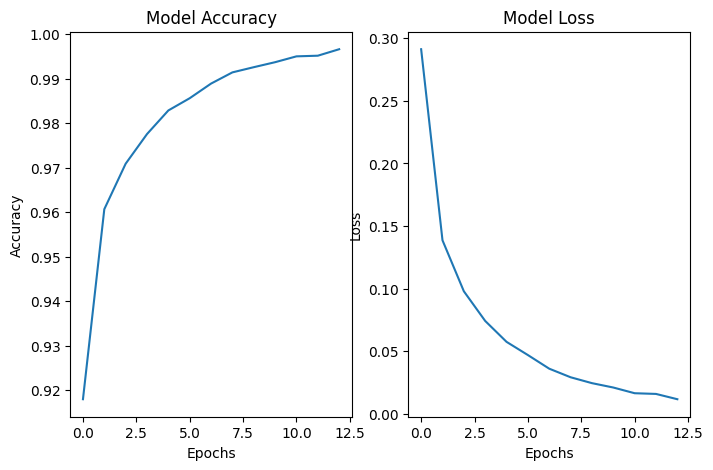

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))
ax[0].plot(history.history["accuracy"])
ax[0].set_title("Model Accuracy")
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Epochs")

ax[1].plot(history.history["loss"])
ax[1].set_title("Model Loss")
ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epochs")

In [23]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
print(type(predictions))
print(predictions.ndim)
print(predictions.shape)

<class 'numpy.ndarray'>
2
(10000, 10)


In [25]:
predictions[0].round(2)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [26]:
test_labels[0]

7

Text(0.5, 1.0, '7')

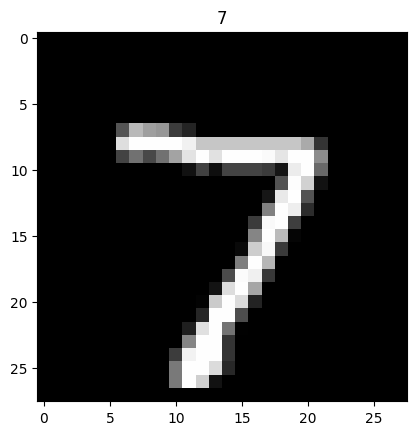

In [28]:
plt.imshow(test_images[0])
plt.title(np.argmax(predictions[0]))

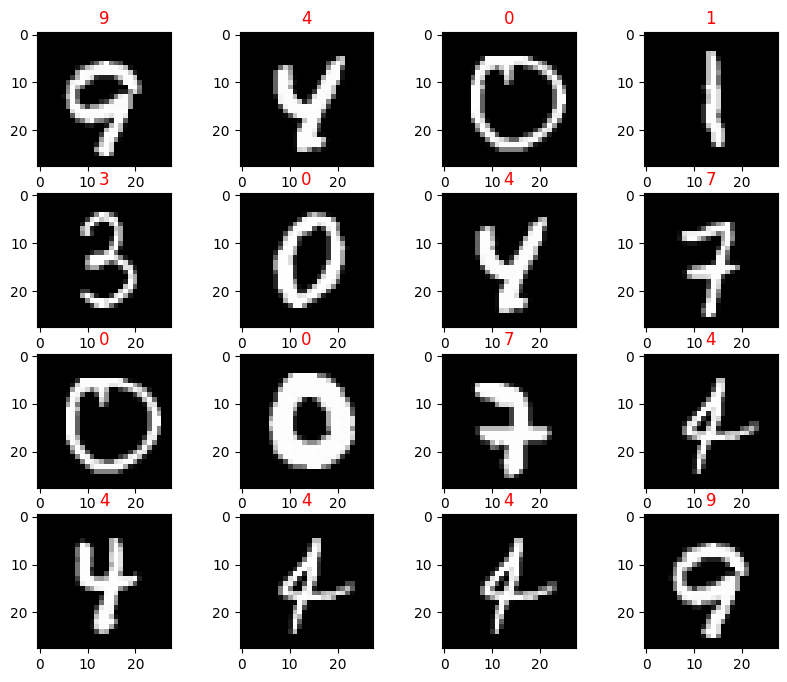

In [40]:
fig, ax = plt.subplots(4, 4, figsize=(10, 8))
integers = list(range(300, 316))

for row in range(4):
    for col in range(4):
        rd = random.choice(integers)
        ax[row][col].imshow(test_images[rd])
        ax[row][col].set_title(np.argmax(predictions[rd]), color="red")